<a href="https://colab.research.google.com/github/Ziqi-Li/ASU-GIS-322-Fall-19/blob/master/4_2_Map_Projections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Managing Projections
=========================================
http://geopandas.org/projections.html


Coordinate Reference Systems
-----------------------------

CRS are important because the geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates related to places on the Earth.

CRS are referred to using codes called `proj4 strings` <https://en.wikipedia.org/wiki/PROJ.4>. You can find the codes for most commonly used projections from `www.spatialreference.org` <http://spatialreference.org/>_.

The same CRS can often be referred to in many ways. For example, one of the most commonly used CRS is the WGS84 latitude-longitude projection. One `proj4` representation of this projection is: ``"+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"``. But common projections can also be referred to by `EPSG` codes, so this same projection can also called using the `proj4` string ``"+init=epsg:4326"``.

*geopandas* can accept lots of representations of CRS, including the `proj4` string itself (``"+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"``) or parameters broken out in a dictionary: ``{'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}``). In addition, some functions will take `EPSG` codes directly.

For reference, a few very common projections and their proj4 strings:

* WGS84 Latitude/Longitude: ``"+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"`` or ``"+init=epsg:4326"``
* UTM Zones (North): ``"+proj=utm +zone=33 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"``
* UTM Zones (South): ``"+proj=utm +zone=33 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +south"``



Setting a Projection
----------------------

There are two relevant operations for projections: setting a projection and re-projecting.

Setting a projection may be necessary when for some reason *geopandas* has coordinate data (x-y values), but no information about how those coordinates refer to locations in the real world. Setting a projection is how one tells *geopandas* how to interpret coordinates. If no CRS is set, *geopandas* geometry operations will still work, but coordinate transformations will not be possible and exported files may not be interpreted correctly by other software.

Be aware that **most of the time** you don't have to set a projection. Data loaded from a reputable source (using the ``from_file()`` command) *should* always include projection information. You can see an objects current CRS through the ``crs`` attribute: ``my_geoseries.crs``.

From time to time, however, you may get data that does not include a projection. In this situation, you have to set the CRS so *geopandas* knows how to interpret the coordinates.

For example, if you convert a spreadsheet of latitudes and longitudes into a GeoSeries by hand, you would set the projection by assigning the WGS84 latitude-longitude CRS to the ``crs`` attribute:

   `my_geoseries.crs = {'init' :'epsg:4326'}`




Re-Projecting
----------------

Re-projecting is the process of changing the representation of locations from one coordinate system to another. All projections of locations on the Earth into a two-dimensional plane `are distortions` <https://en.wikipedia.org/wiki/Map_projection#Which_projection_is_best.3F>, the projection that is best for your application may be different from the projection associated with the data you import. In these cases, data can be re-projected using the ``to_crs`` command:


In [ ]:
!pip install geopandas
import geopandas

In [2]:
%matplotlib inline

In [3]:
# load example data
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

<ipython-input-3-84b652f5a421>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [4]:
# Check original projection
# (it's Platte Carre! x-y are long and lat)
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

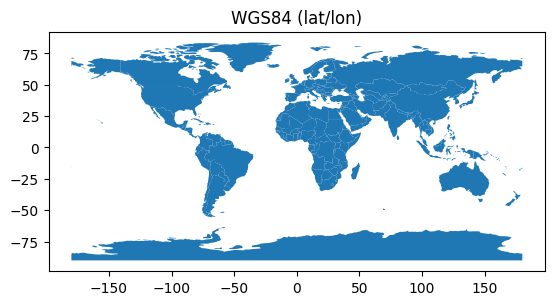

In [5]:
# Visualize
ax = world.plot()
ax.set_title("WGS84 (lat/lon)");

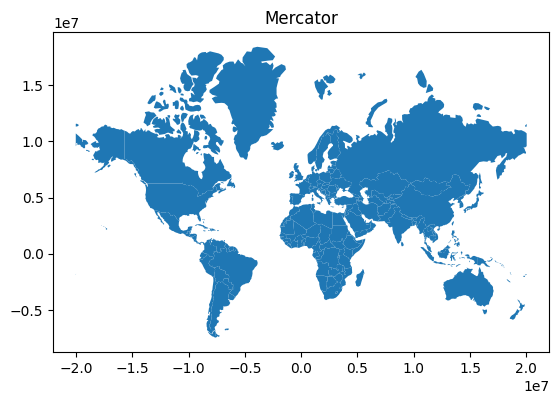

In [6]:
# Reproject to Mercator (after dropping Antartica)
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world = world.to_crs(epsg=3395)
ax = world.plot()
ax.set_title("Mercator");